# **Modelo para Classificação de Roupas**

## Importação de bibliotecas

In [12]:
import tensorflow
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

## Importação do dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


##Exploração dos dados

In [3]:
imagens_treino.shape #Dimensões do dataset de treino

(60000, 28, 28)

In [4]:
imagens_teste.shape #Dimensões do dataset de teste

(10000, 28, 28)

Text(0.5, 1.0, '9')

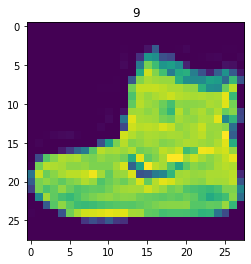

In [5]:
plt.imshow(imagens_treino[0]) #Visualização da primeira imagem do dataset de treino
plt.title(identificacoes_treino[0]) #Índice do tipo de roupa

In [6]:
nome_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota'] #Tradução do índice do tipo de roupa

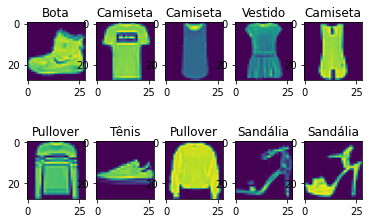

In [7]:
#Laço para mostrar 10 imagens do dataset de treino
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])

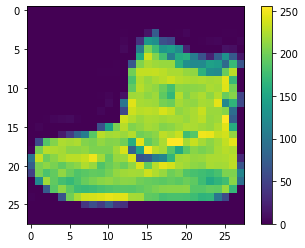

In [8]:
#Exibindo a gradação de cores da imagem
plt.imshow(imagens_treino[0])
plt.colorbar()

## Criando o modelo

In [9]:
imagens_treino = imagens_treino / 255.0 #Normalizando os dados

In [36]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #processamento
    keras.layers.Dropout(0.2), #taxa de neurônios que ficarão 'dormentes'
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #saída
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] #imprime a acurácia do modelo a cada época
)

historico = modelo.fit(imagens_treino, identificacoes_treino,
            epochs=5, #quantidade de épocas, número de vezes que o modelo irá treinar
            validation_split=0.2 #quebra para dados de validação
)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5293 - accuracy: 0.8128 - val_loss: 0.4359 - val_accuracy: 0.8408
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3983 - accuracy: 0.8567 - val_loss: 0.3732 - val_accuracy: 0.8634
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3593 - accuracy: 0.8689 - val_loss: 0.3496 - val_accuracy: 0.8730
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3349 - accuracy: 0.8751 - val_loss: 0.3510 - val_accuracy: 0.8680
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3223 - accuracy: 0.8811 - val_loss: 0.3355 - val_accuracy: 0.8784


In [37]:
#Salvando o modelo
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [40]:
#testando o modelo
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[0]))
print('número da imagem de teste:', identificacoes_teste[0])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste do modelo salvo:', np.argmax(testes_modelo_salvo[0]))
print('número da imagem de teste:', identificacoes_teste[0])

resultado teste: 9
número da imagem de teste: 9
resultado teste do modelo salvo: 9
número da imagem de teste: 9


In [21]:
#Métricas do modelo
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 49.3769 - accuracy: 0.8662
Perda do teste: 49.37691116333008
Acurácia do teste: 0.8661999702453613


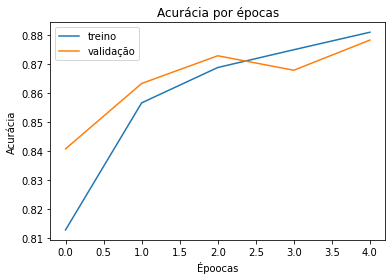

In [38]:
#Plotando a acurácia por épocas
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Époocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])

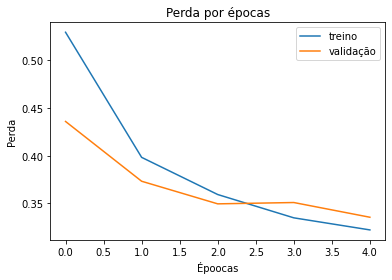

In [39]:
#Plotando a perda por épocas
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Époocas')
plt.ylabel('Perda')
plt.legend(['treino', 'validação'])